In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

train_data = '../data/train.csv'
test_data = '../data/test.csv'
log_path = '../results_2/'

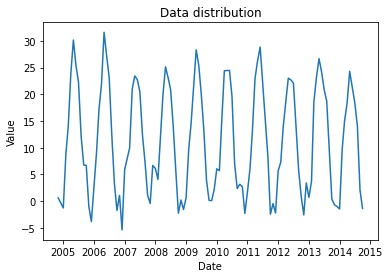

In [61]:
f = open(train_data, 'r')
x, y = [], []

for line in f.readlines()[1:]:
    nums = line.strip().split(',')
    tokens = nums[0].split('/')
    x.append('/'.join(tokens))
    y.append(float(nums[1]))
f.close()

x = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in x]
x, y = zip(*sorted(zip(x, y)))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data distribution')
plt.show()

In [62]:
x_mon = [xi.month for xi in x]
m_avg = [[] for i in range(12)]

for (m, y_out) in zip(x_mon, y):
    m_avg[m-1].append(y_out)
m_avg = [np.array(m).mean() for m in m_avg]

In [63]:
num_yrs, start_yr = 11, 2004
x_yr = [xi.year for xi in x]
yr_avg = [[] for i in range(num_yrs)]

for (yr, y_out) in zip(x_yr, y):
    yr_avg[yr-start_yr].append(y_out)
yr_avg = [np.array(yr).mean() for yr in yr_avg]


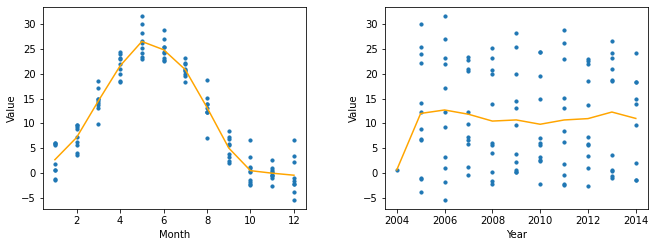

In [64]:
fig, axs = plt.subplots(1,2)
axs = axs.ravel()

axs[0].scatter(x_mon, y, s=10)
axs[0].plot(range(1,13), m_avg, color='orange')
axs[0].set(xlabel='Month', ylabel='Value')

axs[1].scatter(x_yr, y, s=10)
axs[1].plot(range(start_yr,start_yr+num_yrs), yr_avg, color='orange')
axs[1].set(xlabel='Year', ylabel='Value')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.7, wspace=0.3, hspace=0.4)
plt.show()

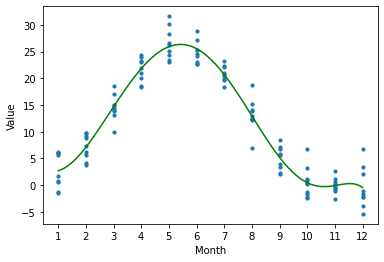

In [65]:
def get_output_from_weights(x, weights):
    tokens = weights.split(',')
    weights = np.array([float(wt) for wt in tokens])
    deg = len(weights)
    y = np.matmul(x.reshape(-1,1).repeat(deg, 1)**np.arange(deg).reshape(1,-1), weights)
    return y

wts_file = 'log_wts.txt'
f = open(os.path.join(log_path, wts_file), 'r')
x, fx = np.linspace(1, 12, 100), []

for line in f.readlines():
    y_out = get_output_from_weights(x, line.strip())
    fx.append(y_out)
f.close()
fx = np.array(fx).reshape(-1)
plt.plot(x, fx, color='green')
plt.scatter(x_mon, y, s=10)
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(np.arange(1,13))
plt.show()